In [ ]:
# !pip install catboost
# !pip install --upgrade xgboost


# Import the library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import DMatrix
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.model_selection import train_test_split
import gc

# READING THE TRAIN AND TEST FILE PATH

In [ ]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

# TRAIN AND TEST DATASET SAMPLE

In [ ]:
df_train.sample(5).style.background_gradient()

In [ ]:
df_test.sample(5).style.background_gradient()

# INFORMATION ABOUT TRAIN AND TEST DATA

In [ ]:
df_train.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


# STATICAL INFORMATION ABOUT TRAIN AND TEST DATA

In [ ]:
df_train.describe().T.style.background_gradient()

In [ ]:
df_test.describe().T.style.background_gradient()

# NULL VALUE CHECK IN TRAIN AND TEST DATA

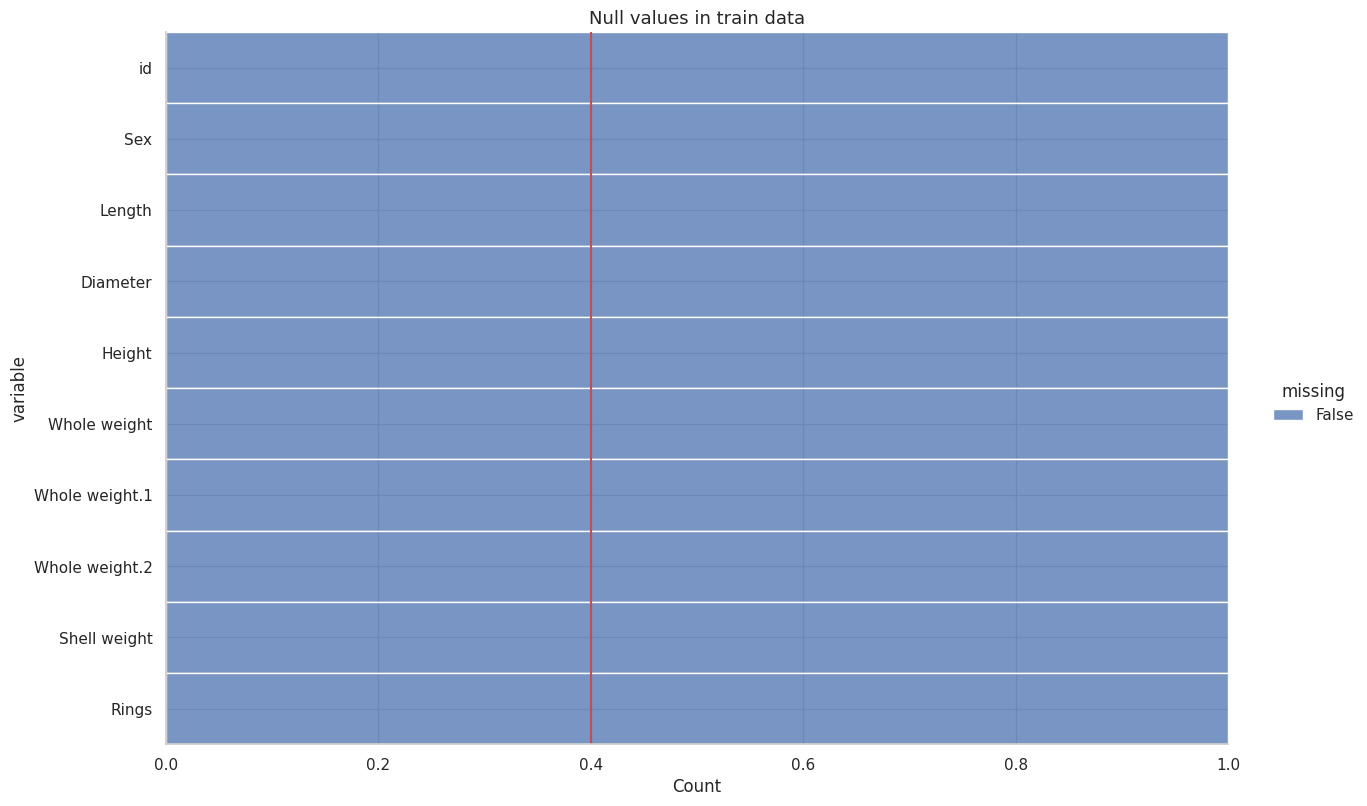

In [ ]:
sns.displot(data=df_train.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

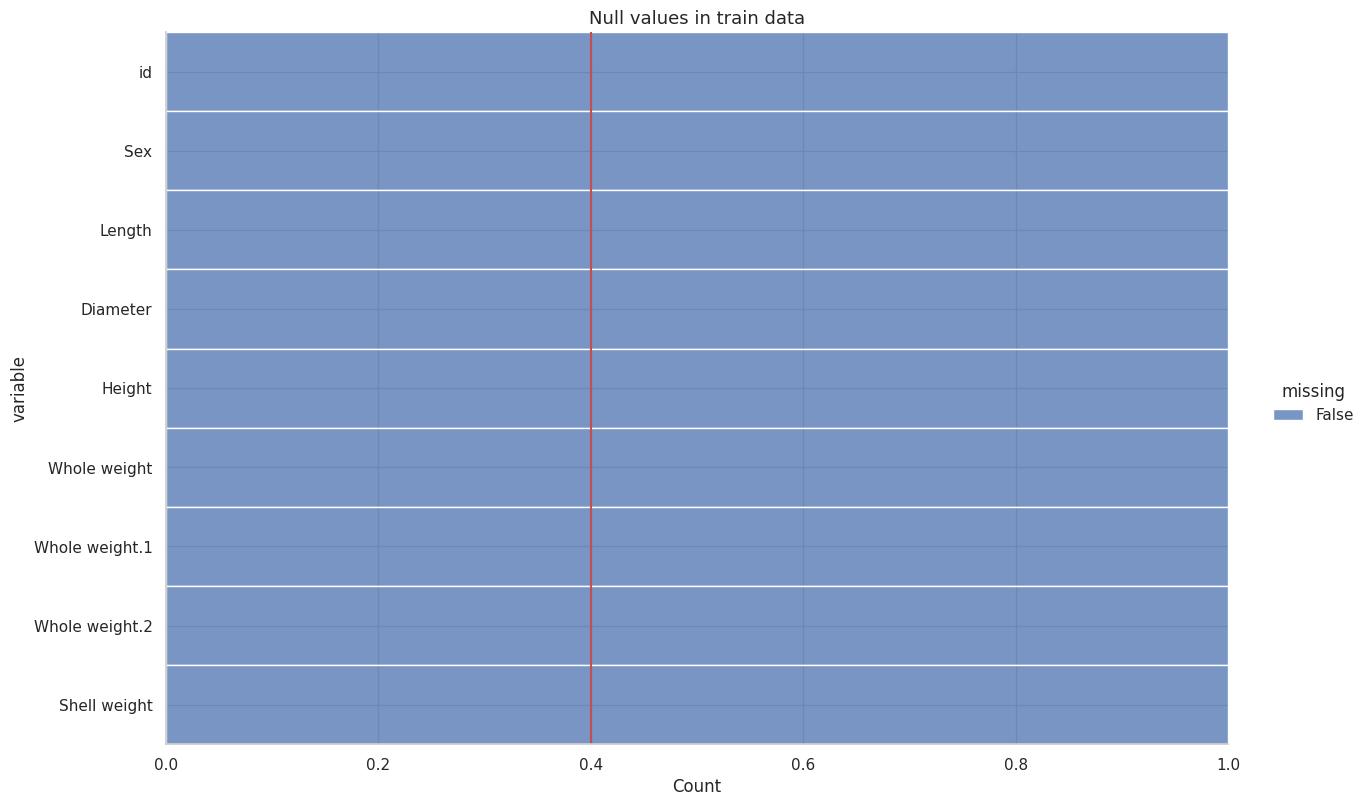

In [ ]:
sns.displot(data=df_test.isnull().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',multiple='fill',height=8,aspect = 1.6)
plt.axvline(0.4,color = 'r')
plt.title("Null values in train data",fontsize = 13)
plt.show()

# CATEGORICAL COLUMN ANALYSISüéá

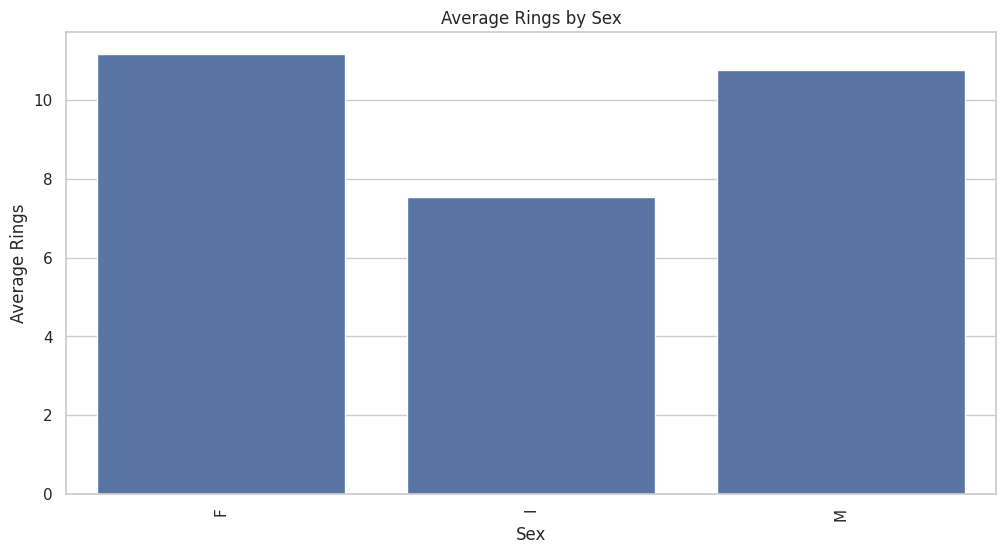

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Rings', data=df_train, errorbar=None)
plt.title('Average Rings by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Rings')
plt.xticks(rotation=90)
plt.show()

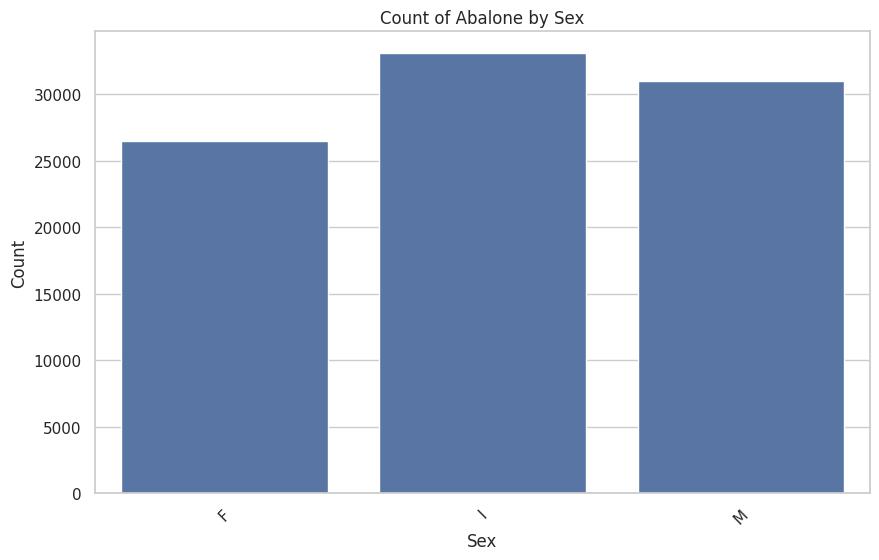

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df_train)
plt.title('Count of Abalone by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# üîçFEATURE ENGENEERINGüîç

In [ ]:
df_train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
df_train['Diameter_to_Height_Ratio'] = df_train['Diameter'] / df_train['Height']
df_train['Combined_Whole_Weight'] = df_train['Whole weight'] + df_train['Whole weight.1'] + df_train['Whole weight.2']
df_train['Diameter_Length_Product'] = df_train['Diameter'] * df_train['Length']
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_train['Shell_Volume'] = (4/3) * 3.14 * (df_train['Diameter'] / 2)**2 * df_train['Height']
df_train['Shell_Surface_Area'] = 4 * 3.14 * (df_train['Diameter'] / 2)**2
df_train['Shell_Density'] = df_train['Shell weight'] / df_train['Shell_Volume']
df_train['Shell_Thickness'] = df_train['Height'] - df_train['Diameter']
df_train['Shell_Shape_Index'] = df_train['Shell_Surface_Area'] / df_train['Shell_Volume']
df_train['Length_to_Height_Ratio'] = df_train['Length'] / df_train['Height']

In [ ]:
df_test['Diameter_to_Height_Ratio'] = df_test['Diameter'] / df_test['Height']
df_test['Combined_Whole_Weight'] = df_test['Whole weight'] + df_test['Whole weight.1'] + df_test['Whole weight.2']
df_test['Diameter_Length_Product'] = df_test['Diameter'] * df_test['Length']
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
df_test['Sex'] = df_test['Sex'].map(sex_mapping)
df_test['Shell_Volume'] = (4/3) * 3.14 * (df_test['Diameter'] / 2)**2 * df_test['Height']
df_test['Shell_Surface_Area'] = 4 * 3.14 * (df_test['Diameter'] / 2)**2
df_test['Shell_Density'] = df_test['Shell weight'] / df_test['Shell_Volume']
df_test['Shell_Thickness'] = df_test['Height'] - df_test['Diameter']
df_test['Shell_Shape_Index'] = df_test['Shell_Surface_Area'] / df_test['Shell_Volume']
df_test['Length_to_Height_Ratio'] = df_test['Length'] / df_test['Height']

In [ ]:
df_train.sample(5).style.background_gradient()

In [ ]:
df_test.sample(5).style.background_gradient()

In [ ]:
unique_counts = df_train.nunique()
#Threshold to distinguish continous and categorical
threshold = 12
continuous_vars_temp = unique_counts[unique_counts > threshold].index.tolist()
#categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
if 'id' in continuous_vars_temp:
    continuous_vars_temp.remove('id')

In [ ]:
numerical_columns = df_train.select_dtypes(include='number').columns

In [ ]:
numerical_columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings',
       'Diameter_to_Height_Ratio', 'Combined_Whole_Weight',
       'Diameter_Length_Product', 'Shell_Volume', 'Shell_Surface_Area',
       'Shell_Density', 'Shell_Thickness', 'Shell_Shape_Index',
       'Length_to_Height_Ratio'],
      dtype='object')

# üéáREMOVING THE OUTLIERSüéá

In [ ]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

columns_to_remove_outliers_replace = continuous_vars_temp
df_train = remove_outliers_replace(df_train, columns_to_remove_outliers_replace)

<ipython-input-639-faf07c56ce88>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.206054894569442' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_no_outliers.loc[is_outlier, column] = mean_value


In [ ]:
columns_to_remove_outliers_replace

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight',
 'Rings',
 'Diameter_to_Height_Ratio',
 'Combined_Whole_Weight',
 'Diameter_Length_Product',
 'Shell_Volume',
 'Shell_Surface_Area',
 'Shell_Density',
 'Shell_Thickness',
 'Shell_Shape_Index',
 'Length_to_Height_Ratio']

In [ ]:
columns_to_remove_outliers_replace_test = ['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Whole weight.1',
 'Whole weight.2',
 'Shell weight',
 'Diameter_to_Height_Ratio',
 'Combined_Whole_Weight',
 'Diameter_Length_Product','Shell_Volume',
 'Shell_Surface_Area',
 'Shell_Density',
 'Shell_Thickness',
 'Shell_Shape_Index',
 'Length_to_Height_Ratio']
df_test = remove_outliers_replace(df_test, columns_to_remove_outliers_replace_test)

In [ ]:
df_train

id  Sex    Length  Diameter    Height  Whole weight  Whole weight.1  \
0          0    1  0.550000   0.43000  0.150000        0.7715          0.3285   
1          1    1  0.630000   0.49000  0.145000        1.1300          0.4580   
2          2    2  0.522593   0.40645  0.135708        0.0210          0.0055   
3          3    0  0.595000   0.47500  0.150000        0.9145          0.3755   
4          4    2  0.555000   0.42500  0.130000        0.7820          0.3695   
...      ...  ...       ...       ...       ...           ...             ...   
90610  90610    0  0.335000   0.23500  0.075000        0.1585          0.0685   
90611  90611    0  0.555000   0.42500  0.150000        0.8790          0.3865   
90612  90612    2  0.435000   0.33000  0.095000        0.3215          0.1510   
90613  90613    2  0.345000   0.27000  0.075000        0.2000          0.0980   
90614  90614    2  0.425000   0.32500  0.100000        0.3455          0.1525   

       Whole weight.2  Shell weight  Rings  Diameter_to_Height_Ratio  \
0              0.1465        0.2400   11.0                  2.866667   
1              0.2765        0.3200   11.0                  3.379310   
2              0.0030        0.0050    6.0                  2.996053   
3              0.2055        0.2500   10.0                  3.166667   
4              0.1600        0.1975    9.0                  3.269231   
...               ...           ...    ...                       ...   
90610          0.0370        0.0450    6.0                  3.133333   
90611          0.1815        0.2400    9.0                  2.833333   
90612          0.0785        0.0815    6.0                  3.473684   
90613          0.0490        0.0700    6.0                  3.600000   
90614          0.0785        0.1050    8.0                  3.250000   

       Combined_Whole_Weight  Diameter_Length_Product  Shell_Volume  \
0                     1.2465                 0.236500      0.029029   
1                     1.8645                 0.308700      0.036439   
2                     0.0295                 0.017600      0.000317   
3                     1.4955                 0.282625      0.035423   
4                     1.3115                 0.235875      0.024577   
...                      ...                      ...           ...   
90610                 0.2640                 0.078725      0.004335   
90611                 1.4470                 0.235875      0.028358   
90612                 0.5510                 0.143550      0.010828   
90613                 0.3470                 0.093150      0.005723   
90614                 0.5765                 0.138125      0.011055   

       Shell_Surface_Area  Shell_Density  Shell_Thickness  Shell_Shape_Index  \
0                0.580586       8.267509        -0.280000          20.000000   
1                0.753914       8.781757        -0.345000          20.689655   
2                0.037994       8.676189        -0.268986          22.732078   
3                0.708462       7.057537        -0.325000          20.000000   
4                0.567163       8.035955        -0.295000          23.076923   
...                   ...            ...              ...                ...   
90610            0.173406      10.380234        -0.160000          40.000000   
90611            0.567163       8.463183        -0.275000          20.000000   
90612            0.341946       7.526581        -0.235000          31.578947   
90613            0.228906       8.676189        -0.195000          40.000000   
90614            0.331663       9.497607        -0.225000          30.000000   

       Length_to_Height_Ratio  
0                    3.666667  
1                    4.344828  
2                    3.873581  
3                    3.966667  
4                    4.269231  
...                       ...  
90610                4.466667  
90611                3.700000  
90612                4.578947  
90613                4.600000  
90614 

In [ ]:
df_test

id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0       90615    0   0.645     0.475   0.155        1.2380          0.6185   
1       90616    0   0.580     0.460   0.160        0.9830          0.4785   
2       90617    0   0.560     0.420   0.140        0.8395          0.3525   
3       90618    0   0.570     0.490   0.145        0.8740          0.3525   
4       90619    2   0.415     0.325   0.110        0.3580          0.1575   
...       ...  ...     ...       ...     ...           ...             ...   
60406  151021    2   0.345     0.260   0.085        0.1775          0.0735   
60407  151022    1   0.525     0.410   0.145        0.8445          0.3885   
60408  151023    2   0.590     0.440   0.155        1.1220          0.3930   
60409  151024    1   0.660     0.525   0.190        1.4935          0.5885   
60410  151025    1   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  Diameter_to_Height_Ratio  \
0              0.3125        0.3005                  3.064516   
1              0.2195        0.2750                  2.875000   
2              0.1845        0.2405                  3.000000   
3              0.1865        0.2350                  3.379310   
4              0.0670        0.1050                  2.954545   
...               ...           ...                       ...   
60406          0.0265        0.0500                  3.058824   
60407          0.1670        0.2050                  2.827586   
60408          0.2000        0.2650                  2.838710   
60409          0.3575        0.4350                  2.763158   
60410          0.0910        0.0905                  2.833333   

       Combined_Whole_Weight  Diameter_Length_Product  Shell_Volume  \
0                     2.1690                 0.306375      0.036604   
1                     1.6810                 0.266800      0.035436   
2                     1.3765                 0.235200      0.025848   
3                     1.4130                 0.279300      0.036439   
4                     0.5825                 0.134875      0.012161   
...                      ...                      ...           ...   
60406                 0.2775                 0.089700      0.006014   
60407                 1.4000                 0.215250      0.025512   
60408                 1.7150                 0.259600      0.031408   
60409                 2.4395                 0.346500      0.054813   
60410                 0.6585                 0.146200      0.014519   

       Shell_Surface_Area  Shell_Density  Shell_Thickness  Shell_Shape_Index  \
0                0.708462       8.209509           -0.320          19.354839   
1                0.664424       7.760481           -0.300          18.750000   
2                0.553896       9.304222           -0.280          21.428571   
3                0.753914       6.449103           -0.345          20.689655   
4                0.331663       8.634188           -0.215          27.272727   
...                   ...            ...              ...                ...   
60406            0.212264       8.313731           -0.175          35.294118   
60407            0.527834       8.035442           -0.265          20.689655   
60408            0.607904       8.437241           -0.285          19.354839   
60409            0.865463       7.936128           -0.335          15.789474   
60410            0.362984       6.233057           -0.220          25.000000   

       Length_to_Height_Ratio  
0                    4.161290  
1                    3.625000  
2                    4.000000  
3                    3.931034  
4                    3.772727  
...                       ...  
60406                4.058824  
60407                3.620690  
60408                3.806452  
60409                3.473684  
60410                3.583333  

[60411 rows x 18 columns]

# Drop id and rings

In [ ]:
df_train.drop(columns='id',axis = 1,inplace = True)

In [ ]:
df_test.drop(columns='id',axis = 1,inplace = True)

In [ ]:
X = df_train.drop(columns='Rings', axis=1)
y = df_train['Rings']

# ü§ùCORRELATIONü§ù

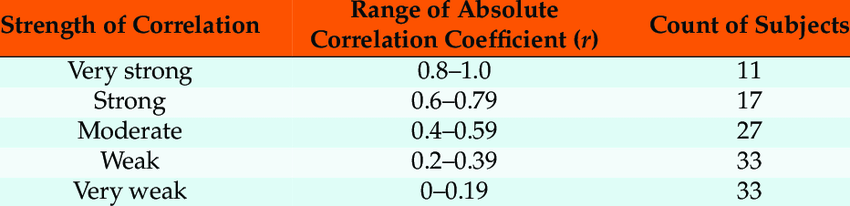

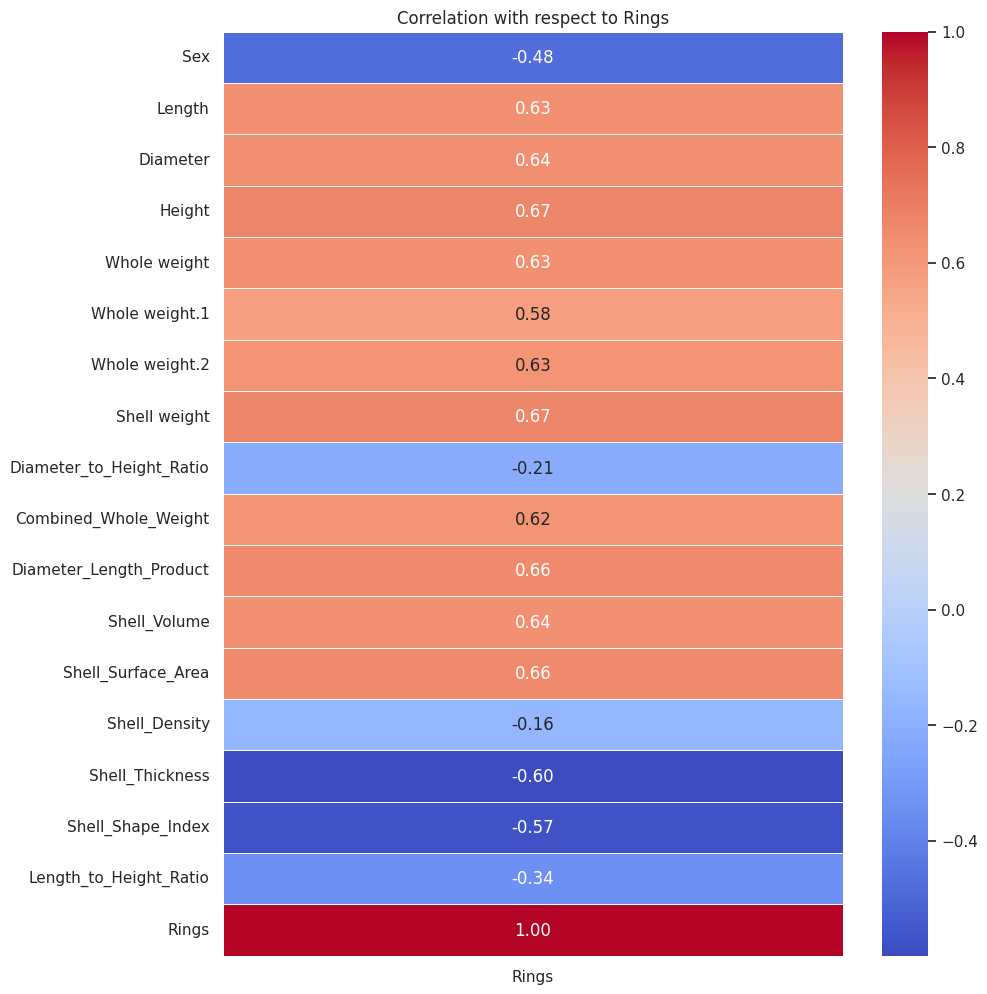

In [ ]:
merged_data = pd.concat([X, y.rename('Rings')], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[['Rings']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with respect to Rings')
plt.show()

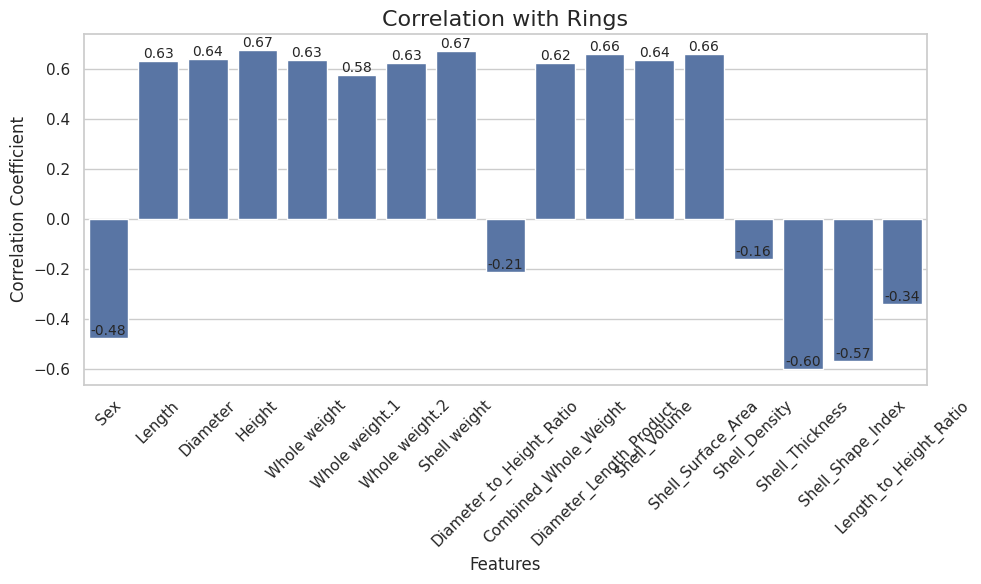

In [ ]:
correlation_matrix = df_train.corr()

correlation_with_price = correlation_matrix['Rings'].drop('Rings')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values)

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10)

plt.title('Correlation with Rings', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

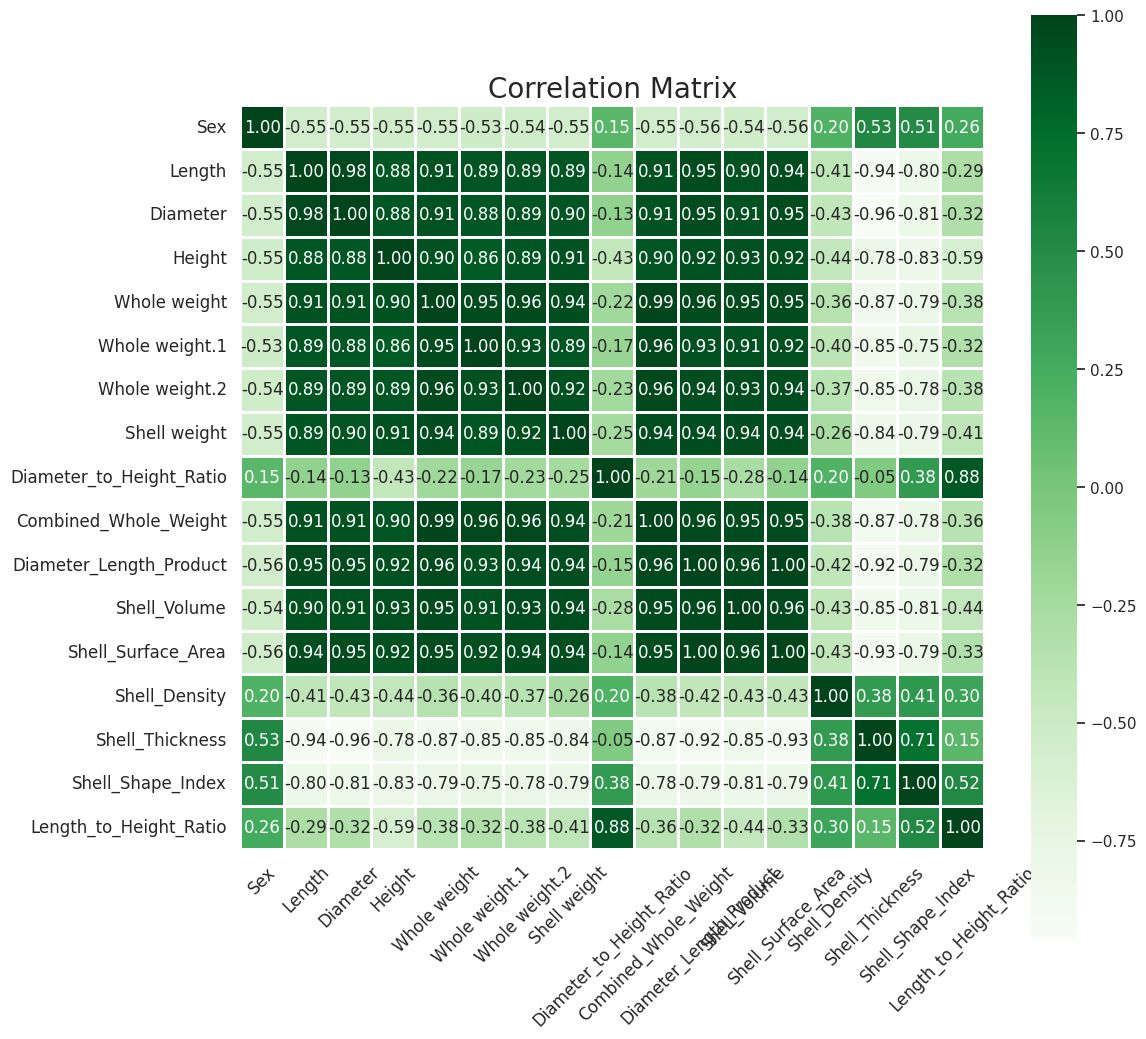

In [ ]:
correlation_matrix = X.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(12, 12))  # Increase the width and height as needed

# Plot the correlation matrix as a heatmap with larger boxes
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=1, square=True)

# Customize plot
plt.title('Correlation Matrix', fontsize=20)  # Increase the font size of the title
plt.xticks(fontsize=12)  # Increase the font size of x-axis labels
plt.yticks(fontsize=12)  # Increase the font size of y-axis labels

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the aspect ratio to prevent distortion of cell shapes
heatmap.set_aspect('equal')

plt.show()

# ‚ú®VARIANCE INFLUENCE FACTOR‚ú®

<ipython-input-650-241763d53ed4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")


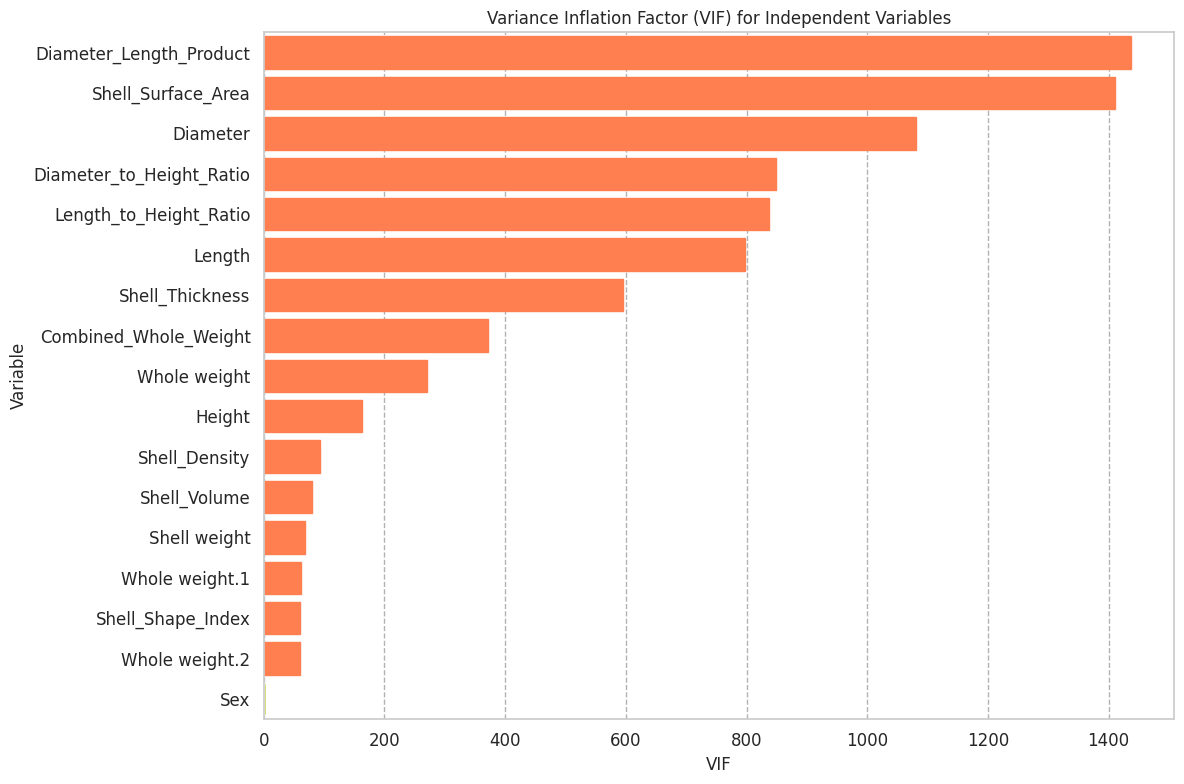

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the dataframe by VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Set a VIF threshold (e.g., VIF > 5)
vif_threshold = 5

# Identify variables with high VIF that exceed the threshold
high_vif_variables = vif_data[vif_data["VIF"] > vif_threshold]

# Create a beautiful bar plot using Seaborn, highlighting high VIF variables
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plot = sns.barplot(x="VIF", y="Variable", data=vif_data, palette="viridis")

# Highlight high VIF variables
for bar in plot.patches:
    if bar.get_width() > vif_threshold:
        bar.set_color('coral')

plt.xlabel('VIF')
plt.ylabel('Variable')
plt.title('Variance Inflation Factor (VIF) for Independent Variables')
plt.xticks(fontsize=12)  # Increase font size of x-axis ticks
plt.yticks(fontsize=12)  # Increase font size of y-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')  # Add grid lines
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

# üîçüîçHYPOTHESIS TESTINGüîçüîç

In [ ]:
target_columns = ['Rings']

# Perform pairwise t-tests for each target column with all other columns
significant_columns = {}
for target in target_columns:
    p_values = {}  # Initialize a dictionary for storing p-values for this target
    for column in df_train.columns:
        if column != target:  # Exclude the target column itself
            t_stat, p_value = ttest_ind(df_train[target], df_train[column])
            p_values[column] = p_value

    # Filter columns based on p-value threshold (e.g., 0.05)
    significant_columns[target] = [col for col, p_val in p_values.items() if p_val <= 0.05]

# Display the number of significant columns for each target column
for target, cols in significant_columns.items():
    print(f"Number of significant columns for '{target}': {len(cols)}")

Number of significant columns for 'Rings': 17


# Standardization

In [ ]:
df_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Diameter_to_Height_Ratio',
       'Combined_Whole_Weight', 'Diameter_Length_Product', 'Shell_Volume',
       'Shell_Surface_Area', 'Shell_Density', 'Shell_Thickness',
       'Shell_Shape_Index', 'Length_to_Height_Ratio'],
      dtype='object')

In [ ]:
X_scale = df_train.drop(columns='Rings', axis=1)
y_scale = df_train['Rings']

In [ ]:
ss = StandardScaler()
X_scale_S = ss.fit_transform(X_scale)

In [ ]:
X_scale_S

array([[-2.71139689e-02,  2.48916152e-01,  2.58151123e-01, ...,
        -1.81823943e-01, -4.70645765e-01, -5.59850889e-01],
       [-2.71139689e-02,  9.75497355e-01,  9.15856362e-01, ...,
        -1.25484078e+00, -3.51841226e-01,  1.27505542e+00],
       [ 1.16210786e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -6.12013841e-16,  0.00000000e+00],
       ...,
       [ 1.16210786e+00, -7.95544327e-01, -8.38024277e-01, ...,
         5.61033869e-01,  1.52401992e+00,  1.90851549e+00],
       [ 1.16210786e+00, -1.61294818e+00, -1.49572952e+00, ...,
         1.22135192e+00,  2.97468587e+00,  1.96547779e+00],
       [ 1.16210786e+00, -8.86366977e-01, -8.92833047e-01, ...,
         7.26113383e-01,  1.25202005e+00,  1.01847953e+00]])

# TRAIN - TEST - SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale_S, y, test_size=0.2, random_state=42)

## T·∫°o DMatrix cho t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p validation

In [ ]:
X_trainXG, X_validXG, y_trainXG, y_validXG = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtrain = xgb.DMatrix(X_trainXG, label=y_trainXG)
dvalid = xgb.DMatrix(X_validXG, label=y_validXG)

# ‚ú®HYPERTUNING ‚ú® - tƒÉng c∆∞·ªùng hi·ªáu ch·ªânh

## XGBoost

In [ ]:
best_params = {
    'learning_rate': 0.02708319027879099,
    'n_estimators': 1000,                 # S·ª≠ d·ª•ng 'num_boost_round' l√† 'n_estimators' trong XGBRegressor
    'reg_alpha': 0.14219650343206225,
    'reg_lambda': 0.5045620145662986,
    'max_depth': 12,
    'subsample': 0.9537603851451735,
    'colsample_bytree': 0.7819555259366398,
    'min_child_weight': 1.03921704772634,
    'objective': 'reg:squarederror',  # H√†m m·ª•c ti√™u cho b√†i to√°n h·ªìi quy
    'eval_metric': 'rmse',
}

In [ ]:
evals = [(dtrain, 'train'), (dvalid, 'eval')]
model_XGB = xgb.XGBRegressor(**best_params)
model_XGB.fit(
    X_scale_S, y,
    eval_set=[(X_scale_S, y)],   # T·∫≠p d·ªØ li·ªáu ƒë·ªÉ ƒë√°nh gi√°, b·∫°n c√≥ th·ªÉ thay b·∫±ng t·∫≠p 'valid' n·∫øu c√≥

    verbose=True
)


[0]	validation_0-rmse:2.23300
[1]	validation_0-rmse:2.19481
[2]	validation_0-rmse:2.15806
[3]	validation_0-rmse:2.12323
[4]	validation_0-rmse:2.08864
[5]	validation_0-rmse:2.05621
[6]	validation_0-rmse:2.02451
[7]	validation_0-rmse:1.99360
[8]	validation_0-rmse:1.96511
[9]	validation_0-rmse:1.93625
[10]	validation_0-rmse:1.90875
[11]	validation_0-rmse:1.88184
[12]	validation_0-rmse:1.85580
[13]	validation_0-rmse:1.83115
[14]	validation_0-rmse:1.80702
[15]	validation_0-rmse:1.78354
[16]	validation_0-rmse:1.76232
[17]	validation_0-rmse:1.74029
[18]	validation_0-rmse:1.71938
[19]	validation_0-rmse:1.69936
[20]	validation_0-rmse:1.67953
[21]	validation_0-rmse:1.66098
[22]	validation_0-rmse:1.64286
[23]	validation_0-rmse:1.62554
[24]	validation_0-rmse:1.60899
[25]	validation_0-rmse:1.59285
[26]	validation_0-rmse:1.57697
[27]	validation_0-rmse:1.56294
[28]	validation_0-rmse:1.54846
[29]	validation_0-rmse:1.53461
[30]	validation_0-rmse:1.52073
[31]	validation_0-rmse:1.50743
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7819555259366398, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02708319027879099,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=1.03921704772634, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# L·∫•y RMSE t·ªët nh·∫•t tr√™n t·∫≠p validation
best_rmse = model.best_score
best_iteration = model.best_iteration

print(f"Best RMSE: {best_rmse} at iteration: {best_iteration}")

AttributeError: `best_score` is only defined when early stopping is used.

## CatBoostRegressor

In [ ]:
best_params_cat ={'learning_rate': 0.07855075323884125, 'n_estimators': 489, 'max_depth': 7,
                  'subsample': 0.8569934338945397, 'colsample_bylevel': 0.8150591618201379,
                  'reg_lambda': 0.4264547280178772}

In [ ]:
# model_cat = CatBoostRegressor(**best_params_cat)
# model_cat.fit(X_scale_S, y)

In [ ]:
# model_cat.best_score_

In [ ]:
# df_train.columns

In [ ]:
# features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
#        'Whole weight.2', 'Shell weight', 'is_child']
# label = 'Rings'
# df_train.info()
# feature_train = df_train[features]
# label_train = df_train[label]
# feature_test = df_test[features]

# Split X_train , y_train , X_test

In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# X = feature_train.iloc[:,:].values
# y = label_train.values

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# scaled_train_data = scaler.fit_transform(feature_train)
# scaled_test_data = scaler.transform(feature_test)


# n_splits = 3
# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
# xgb_predictions = np.zeros(len(scaled_train_data))
# xgb_true_labels = np.zeros(len(scaled_train_data))
# xgb_test_predictions = np.zeros(len(scaled_test_data))

# Training the XGBOOST

In [ ]:
'''
xgb_params={
     'colsample_bytree': 0.7,
     'subsample': 0.7,
     'learning_rate': 0.01,
     'max_depth': 10,
     'random_state': 2020,
     'min_child_weight': 5,
     'n_estimators': 10000,
     'early_stopping_rounds': 200,
     'tree_method': 'hist',
     'device': 'cuda',
}



for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, df_train[label])):
    print(f"Training fold {fold + 1}/{n_splits}...")

    X_train, X_val = scaled_train_data[train_idx], scaled_train_data[val_idx]
    y_train, y_val = df_train[label].iloc[train_idx], df_train[label].iloc[val_idx]

    # Convert data to DMatrix and explicitly specify the device
    dtrain = DMatrix(X_train, label=y_train)
    dval = DMatrix(X_val, label=y_val)
    dtest = DMatrix(scaled_test_data)

    xgb_model = XGBRegressor(**xgb_params)
    xgb_model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  verbose=False)

    xgb_fold_preds = xgb_model.predict(X_val)
    xgb_fold_test_preds = xgb_model.predict(scaled_test_data)
    xgb_predictions[val_idx] = xgb_fold_preds
    xgb_true_labels[val_idx] = y_val
    xgb_test_predictions += xgb_fold_test_preds / n_splits

    fold_rmse = np.sqrt(root_mean_squared_error(y_val, xgb_fold_preds))
    fold_r2 = r2_score(y_val, xgb_fold_preds)
    print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")
    print(f"Fold {fold + 1} R¬≤ Score: {fold_r2:.4f}")

    xgb_model.save_model(f"xgb_fold_{fold + 1}.json")

overall_rmse_xgb = np.sqrt(root_mean_squared_error(xgb_true_labels, xgb_predictions))
overall_r2_xgb = r2_score(xgb_true_labels, xgb_predictions)
print(f"Overall RMSE (XGBRegressor): {overall_rmse_xgb:.4f}")
print(f"Overall R¬≤ Score (XGBRegressor): {overall_r2_xgb:.4f}")
'''

In [ ]:
# best_params_cat ={'learning_rate': 0.07855075323884125, 'n_estimators': 489, 'max_depth': 7,
#                   'subsample': 0.8569934338945397, 'colsample_bylevel': 0.8150591618201379,
#                   'reg_lambda': 0.4264547280178772}
# model_cat = CatBoostRegressor(**best_params_cat)
# model_cat.fit(X_train, y_train)
# y_pred = model_cat.predict(X_test)
# fold_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
# fold_r2 = r2_score(y_pred, y_test)
# print(f"RMSE: {fold_rmse:.4f}")
# print(f"R¬≤ Score: {fold_r2:.4f}")

In [ ]:
# best_params = {'learning_rate': 0.02708319027879099, 'n_estimators': 495, 'reg_alpha': 0.14219650343206225,
#                'reg_lambda': 0.5045620145662986, 'max_depth': 12, 'subsample': 0.9537603851451735,
#                'colsample_bytree': 0.7819555259366398, 'min_child_weight': 1.03921704772634}
# model = XGBRegressor(**best_params)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# fold_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
# fold_r2 = r2_score(y_pred, y_test)
# print(f"RMSE: {fold_rmse:.4f}")
# print(f"R¬≤ Score: {fold_r2:.4f}")